In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['pdf.fonttype'] = 42
import seaborn as sns
import os
import re
import scipy.stats as stats
from collections import Counter
from itertools import combinations


# download the RBNS dataset and process it 

In [5]:
!fastq-dump -A SRR7263706 --split-3 --gzip -O /casa/chemin/p/bioinfo1_2023/data_presentation

Rejected 10604 READS because of filtering out non-biological READS
Read 10604 spots for SRR7263706
Written 10604 spots for SRR7263706


In [2]:
!cutadapt -a AAACTGGAATTCTCGGGTGCCAAGGC -g AATGATACGGCGACCACCGAGATCTACACGTTCAGTAATACGACTCACTATAGGG -m 15 -M 25 -o /casa/chemin/p/bioinfo1_2023/data_presentation/RBNS_tr.fastq.gz /casa/chemin/p/bioinfo1_2023/data_presentation/SRR7263706.fastq.gz

This is cutadapt 4.4 with Python 3.10.8
Command line parameters: -a AAACTGGAATTCTCGGGTGCCAAGGC -g AATGATACGGCGACCACCGAGATCTACACGTTCAGTAATACGACTCACTATAGGG -m 15 -M 25 -o /casa/chemin/p/bioinfo1_2023/data_presentation/RBNS_tr.fastq.gz /casa/chemin/p/bioinfo1_2023/data_presentation/SRR7263706.fastq.gz
Processing single-end reads on 1 core ...
Done           00:00:00        10,604 reads @  32.0 µs/read;   1.87 M reads/minute
Finished in 0.348 s (32.834 µs/read; 1.83 M reads/minute).

=== Summary ===

Total reads processed:                  10,604
Reads with adapters:                    10,534 (99.3%)

== Read fate breakdown ==
Reads that were too short:               3,296 (31.1%)
Reads that were too long:                  263 (2.5%)
Reads written (passing filters):         7,045 (66.4%)

Total basepairs processed:     1,654,224 bp
Total written (filtered):        107,216 bp (6.5%)

=== Adapter 1 ===

Sequence: AAACTGGAATTCTCGGGTGCCAAGGC; Type: regular 3'; Length: 26; Trimmed: 10415 times


In [4]:
!gunzip data_presentation/RBNS_tr.fastq.gz

with open("data_presentation/RBNS_tr.fastq") as f:
    lines = f.readlines()
    seq = {k: v for k, v in zip(lines[::4], lines[1::4])}
seq

In [23]:
seq = {}
with open("data_presentation/RBNS_tr.fastq") as f:
    for i, line in enumerate(f):
        if not i % 4:
            read = line.strip().split()[0]
            assert read not in seq # read in seq이면 error 발생
        elif i % 4 == 1:
            seq[read] = line.strip()
        else:
            continue
seq

{'@SRR7263706.1': 'GGGGAGCAGTCGTTG',
 '@SRR7263706.3': 'GGGGAGAGCGTGTTT',
 '@SRR7263706.4': 'GGGAAGCGGTCGTTT',
 '@SRR7263706.5': 'AGGGTATGATGCGTTT',
 '@SRR7263706.6': 'GGGTAGTGTGCGTTT',
 '@SRR7263706.8': 'GGGGCAAAGAGCGTG',
 '@SRR7263706.12': 'GGGAGTGTGTTGTTT',
 '@SRR7263706.13': 'GGGAGTTGCGTGTTT',
 '@SRR7263706.15': 'GGGCATCGTGAGTTT',
 '@SRR7263706.16': 'GGGGTGTAGTATGTA',
 '@SRR7263706.17': 'GGGTTGAGTATGTTT',
 '@SRR7263706.18': 'GGGTGGCAGTCGTTT',
 '@SRR7263706.21': 'GGGAGGCAGTCGTTG',
 '@SRR7263706.22': 'GGGGTAGTCAGCGTT',
 '@SRR7263706.24': 'GGGATTGGTGAGTTT',
 '@SRR7263706.27': 'GGGAGTGGGTTGTTT',
 '@SRR7263706.29': 'GGGTTGAGCGTGTCT',
 '@SRR7263706.30': 'GGGATGAGCGCGTTT',
 '@SRR7263706.31': 'GGGTAGGTGACGTTT',
 '@SRR7263706.33': 'GGGTTGCGGTCGTTT',
 '@SRR7263706.34': 'GGGAAGAGGTCGTTT',
 '@SRR7263706.35': 'GGGAAGTGAGCGTTT',
 '@SRR7263706.36': 'GGGTGGTGCGTGTTT',
 '@SRR7263706.37': 'GGGGAGCAGTCGTTG',
 '@SRR7263706.38': 'AAGGGGGGTAGTATTG',
 '@SRR7263706.40': 'GGGATAGTGGTGTTT',
 '@SRR7263706.41

with open("data_presentation/RBNS_tr.fastq") as f:
    readlist = f.read().splitlines()
    seq = {k: v for k, v in zip(readlist[::4], readlist[1::4])}
seq

In [24]:
not_GGG = {k:v for k,v in seq.items() if "GGG" not in v}
not_GGG

{'@SRR7263706.107': 'GGTAGTGTGAGTTTA',
 '@SRR7263706.221': 'GGTGTTGTGAGTTTT',
 '@SRR7263706.395': 'GTGAGAGTTGTGTTT',
 '@SRR7263706.440': 'GGTAGTGTGCGTTTG',
 '@SRR7263706.705': 'GGTGAGTACGGTTTA',
 '@SRR7263706.777': 'GGAGAGTCGCGTTTG',
 '@SRR7263706.786': 'AGGTGAGTGATGTGTT',
 '@SRR7263706.971': 'GGAGGCAGTCGTTTGA',
 '@SRR7263706.1099': 'GGTGAGGTGAGTTTT',
 '@SRR7263706.1383': 'GGAGTGAGCACGTTTT',
 '@SRR7263706.1450': 'GGTCATGGTGAGTTT',
 '@SRR7263706.1651': 'GGTCAGGAGGCGTTT',
 '@SRR7263706.1868': 'GGTAGTGTGCGTTTA',
 '@SRR7263706.2398': 'GAGGTAAGTTGTGTTT',
 '@SRR7263706.2435': 'GGTTGAGTGCGTTTC',
 '@SRR7263706.2712': 'GGAAGTGATGCGTTT',
 '@SRR7263706.2762': 'GGTGGAGTTGGTTTC',
 '@SRR7263706.2793': 'GGAAAAGTGAGTTTAG',
 '@SRR7263706.2864': 'GGTAGGAGGCGGTTT',
 '@SRR7263706.2975': 'TTGGAGGAGCGTGTT',
 '@SRR7263706.2982': 'GGAAGGTGAGCGTTT',
 '@SRR7263706.3115': 'CGGAGTAGAGTTTGTG',
 '@SRR7263706.3574': 'GGTGAAGTATGTTTG',
 '@SRR7263706.3583': 'AAAGGAGGATGTCGT',
 '@SRR7263706.3584': 'AGGTGGAGTATGTTT',
 '

In [25]:
len(not_GGG.keys())

76

In [26]:
not_GTTT = {k:v for k,v in seq.items() if "GTTT" not in v}
not_GTTT

{'@SRR7263706.1': 'GGGGAGCAGTCGTTG',
 '@SRR7263706.8': 'GGGGCAAAGAGCGTG',
 '@SRR7263706.16': 'GGGGTGTAGTATGTA',
 '@SRR7263706.21': 'GGGAGGCAGTCGTTG',
 '@SRR7263706.22': 'GGGGTAGTCAGCGTT',
 '@SRR7263706.29': 'GGGTTGAGCGTGTCT',
 '@SRR7263706.37': 'GGGGAGCAGTCGTTG',
 '@SRR7263706.38': 'AAGGGGGGTAGTATTG',
 '@SRR7263706.50': 'GAGGGAGGAGTGCGTT',
 '@SRR7263706.53': 'GAGGGGTGGTATTGTT',
 '@SRR7263706.56': 'GGGAGCAAGTCGTGC',
 '@SRR7263706.57': 'GGGGTGAGTTGGTTC',
 '@SRR7263706.62': 'GGGAGTGGTAAGTAA',
 '@SRR7263706.70': 'GGGGGAAGTCGTGTT',
 '@SRR7263706.73': 'GGGATGAGCGCGTCA',
 '@SRR7263706.74': 'GGGGGTAGTCGTGTAC',
 '@SRR7263706.99': 'GGGTGAGGAGCGTTC',
 '@SRR7263706.151': 'GGGAGGAGTCGGTTC',
 '@SRR7263706.158': 'GGGAGTATGGTGTAT',
 '@SRR7263706.159': 'GGGAGGTAGGCGTTG',
 '@SRR7263706.163': 'GGGGTATGAGTCGTT',
 '@SRR7263706.180': 'GGGATGTGAGCGTAC',
 '@SRR7263706.184': 'GGGTGGACGTCGTCA',
 '@SRR7263706.193': 'GGGGAGAGCGTCGTT',
 '@SRR7263706.194': 'GGGGTGAATAGTGTT',
 '@SRR7263706.207': 'GTGGGATTGAGTTGT',
 

In [27]:
len(not_GTTT.keys())

1240

In [28]:
df_seq = pd.DataFrame.from_dict(seq, orient="index", columns=["seq"])
df_seq

,seq
@SRR7263706.1,GGGGAGCAGTCGTTG
@SRR7263706.3,GGGGAGAGCGTGTTT
@SRR7263706.4,GGGAAGCGGTCGTTT
@SRR7263706.5,AGGGTATGATGCGTTT
@SRR7263706.6,GGGTAGTGTGCGTTT
...,...
@SRR7263706.10598,GGGAGTGTGGTGTTT
@SRR7263706.10599,GGGGAGCAGTCGTTT
@SRR7263706.10601,GGGGGAGGGAGTTGT
@SRR7263706.10602,GGGTAGAGTGCGTTTA


In [29]:
df_seq['gggPos'] = df_seq.apply(lambda x: x.seq.find("GGG"), axis=1)
df_seq

,seq,gggPos
@SRR7263706.1,GGGGAGCAGTCGTTG,0
@SRR7263706.3,GGGGAGAGCGTGTTT,0
@SRR7263706.4,GGGAAGCGGTCGTTT,0
@SRR7263706.5,AGGGTATGATGCGTTT,1
@SRR7263706.6,GGGTAGTGTGCGTTT,0
...,...,...
@SRR7263706.10598,GGGAGTGTGGTGTTT,0
@SRR7263706.10599,GGGGAGCAGTCGTTT,0
@SRR7263706.10601,GGGGGAGGGAGTTGT,0
@SRR7263706.10602,GGGTAGAGTGCGTTTA,0


In [30]:
df_seq['gtttPos'] = df_seq['gtttPos'] = df_seq.apply(lambda x: x.seq.find("GTTT"), axis=1)
df_seq

,seq,gggPos,gtttPos
@SRR7263706.1,GGGGAGCAGTCGTTG,0,-1
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11
@SRR7263706.5,AGGGTATGATGCGTTT,1,12
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11
...,...,...,...
@SRR7263706.10598,GGGAGTGTGGTGTTT,0,11
@SRR7263706.10599,GGGGAGCAGTCGTTT,0,11
@SRR7263706.10601,GGGGGAGGGAGTTGT,0,-1
@SRR7263706.10602,GGGTAGAGTGCGTTTA,0,11


In [31]:
df_seq['len_btn'] = df_seq['gtttPos'] - df_seq['gggPos']
df_seq

,seq,gggPos,gtttPos,len_btn
@SRR7263706.1,GGGGAGCAGTCGTTG,0,-1,-1
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11,11
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11,11
@SRR7263706.5,AGGGTATGATGCGTTT,1,12,11
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11,11
...,...,...,...,...
@SRR7263706.10598,GGGAGTGTGGTGTTT,0,11,11
@SRR7263706.10599,GGGGAGCAGTCGTTT,0,11,11
@SRR7263706.10601,GGGGGAGGGAGTTGT,0,-1,-1
@SRR7263706.10602,GGGTAGAGTGCGTTTA,0,11,11


In [32]:
df_seq[df_seq['len_btn']!=11]

,seq,gggPos,gtttPos,len_btn
@SRR7263706.1,GGGGAGCAGTCGTTG,0,-1,-1
@SRR7263706.8,GGGGCAAAGAGCGTG,0,-1,-1
@SRR7263706.16,GGGGTGTAGTATGTA,0,-1,-1
@SRR7263706.21,GGGAGGCAGTCGTTG,0,-1,-1
@SRR7263706.22,GGGGTAGTCAGCGTT,0,-1,-1
...,...,...,...,...
@SRR7263706.10586,GTGGGGGTTTGTATT,2,6,4
@SRR7263706.10587,GGGAGGCAGTCGTTG,0,-1,-1
@SRR7263706.10594,GAGGGAGGTCGTAGT,2,-1,-3
@SRR7263706.10595,GGGATGAGTTTGTAT,0,7,7


In [33]:
df_seq[(df_seq['len_btn']==11) & (df_seq['gggPos']==-1)]

,seq,gggPos,gtttPos,len_btn
@SRR7263706.107,GGTAGTGTGAGTTTA,-1,10,11
@SRR7263706.221,GGTGTTGTGAGTTTT,-1,10,11
@SRR7263706.440,GGTAGTGTGCGTTTG,-1,10,11
@SRR7263706.705,GGTGAGTACGGTTTA,-1,10,11
@SRR7263706.777,GGAGAGTCGCGTTTG,-1,10,11
@SRR7263706.971,GGAGGCAGTCGTTTGA,-1,10,11
@SRR7263706.1099,GGTGAGGTGAGTTTT,-1,10,11
@SRR7263706.1868,GGTAGTGTGCGTTTA,-1,10,11
@SRR7263706.2435,GGTTGAGTGCGTTTC,-1,10,11
@SRR7263706.2762,GGTGGAGTTGGTTTC,-1,10,11


<Axes: xlabel='len_btn'>

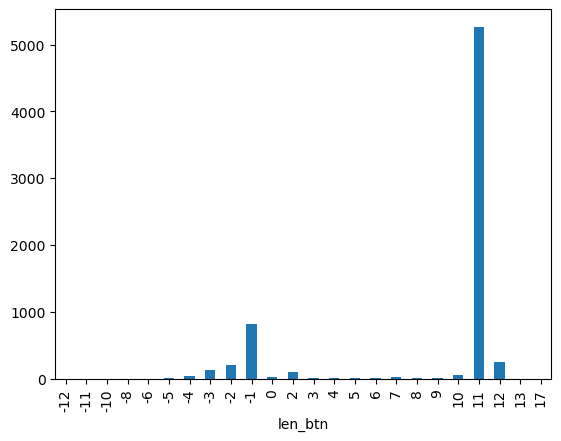

In [34]:
df_seq.groupby('len_btn')['seq'].count().plot.bar()

In [35]:
df_seq[df_seq['len_btn']==17] #exclude

,seq,gggPos,gtttPos,len_btn
@SRR7263706.9483,GGGATGGGGAGTTGAGCGTTT,0,17,17


In [36]:
df_seq[df_seq['len_btn']==13] #exclude

,seq,gggPos,gtttPos,len_btn
@SRR7263706.2398,GAGGTAAGTTGTGTTT,-1,12,13
@SRR7263706.2502,GGGGGGGAGTCGCGTTT,0,13,13
@SRR7263706.4526,GGGGGGCGAGCGTGTTT,0,13,13
@SRR7263706.5724,GGTGAAGGAGTTGTTT,-1,12,13
@SRR7263706.6812,GGAGTGAGTGATGTTT,-1,12,13
@SRR7263706.8001,GGGGGTGTGTCGTGTTT,0,13,13


In [37]:
df_seq[df_seq['len_btn']==12]

,seq,gggPos,gtttPos,len_btn
@SRR7263706.49,GGGGAGTGATGCGTTT,0,12,12
@SRR7263706.71,GGGGAGAGTCGTGTTT,0,12,12
@SRR7263706.91,GGGGATAGTGGAGTTT,0,12,12
@SRR7263706.95,GGGGTATCAGTCGTTT,0,12,12
@SRR7263706.181,GGGGATGAGCGCGTTT,0,12,12
...,...,...,...,...
@SRR7263706.10432,GGGGAGTGAGTTGTTT,0,12,12
@SRR7263706.10445,GGGGTTAGTGATGTTT,0,12,12
@SRR7263706.10472,GGGGATGAGCGTGTTT,0,12,12
@SRR7263706.10510,GGGGGAGGTCGTGTTT,0,12,12


In [38]:
df_seq[(df_seq['len_btn']==12) & (df_seq['gggPos']==-1)]

,seq,gggPos,gtttPos,len_btn
@SRR7263706.395,GTGAGAGTTGTGTTT,-1,11,12
@SRR7263706.1383,GGAGTGAGCACGTTTT,-1,11,12
@SRR7263706.1450,GGTCATGGTGAGTTT,-1,11,12
@SRR7263706.1651,GGTCAGGAGGCGTTT,-1,11,12
@SRR7263706.2712,GGAAGTGATGCGTTT,-1,11,12
@SRR7263706.2864,GGTAGGAGGCGGTTT,-1,11,12
@SRR7263706.2982,GGAAGGTGAGCGTTT,-1,11,12
@SRR7263706.3584,AGGTGGAGTATGTTT,-1,11,12
@SRR7263706.4263,GGTCAAGTCGTGTTTG,-1,11,12
@SRR7263706.4501,GGATGAGTGACGTTT,-1,11,12


In [39]:
df_seq_gtt = df_seq[df_seq['len_btn']==-1] # if seq == GGG~GTT then len_btn == -1
df_seq_gtt['gttPos'] = df_seq_gtt.apply(lambda x: x.seq.rfind("GTT"), axis=1)
df_seq_gtt['len_btn_gtt'] = df_seq_gtt['gttPos'] - df_seq_gtt['gggPos']
df_seq_gtt

/tmp/ipykernel_31296/4229507086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seq_gtt['gttPos'] = df_seq_gtt.apply(lambda x: x.seq.rfind("GTT"), axis=1)
/tmp/ipykernel_31296/4229507086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seq_gtt['len_btn_gtt'] = df_seq_gtt['gttPos'] - df_seq_gtt['gggPos']


,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt
@SRR7263706.1,GGGGAGCAGTCGTTG,0,-1,-1,11,11
@SRR7263706.8,GGGGCAAAGAGCGTG,0,-1,-1,-1,-1
@SRR7263706.16,GGGGTGTAGTATGTA,0,-1,-1,-1,-1
@SRR7263706.21,GGGAGGCAGTCGTTG,0,-1,-1,11,11
@SRR7263706.22,GGGGTAGTCAGCGTT,0,-1,-1,12,12
...,...,...,...,...,...,...
@SRR7263706.10477,GGGGGCAGTTCGTGTT,0,-1,-1,13,13
@SRR7263706.10484,GGGTTGAGTACGAAAA,0,-1,-1,2,2
@SRR7263706.10494,GGGGGAGGTTGTCGT,0,-1,-1,7,7
@SRR7263706.10587,GGGAGGCAGTCGTTG,0,-1,-1,11,11


<Axes: xlabel='len_btn_gtt'>

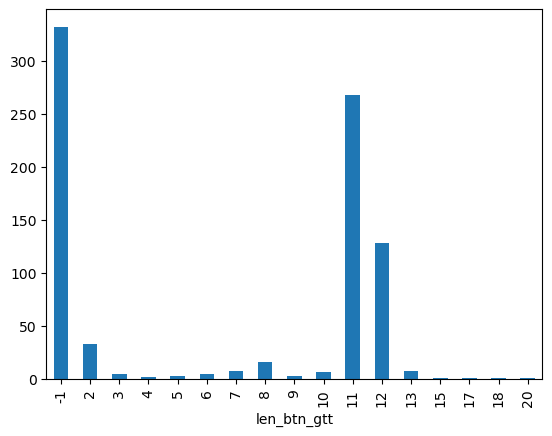

In [40]:
df_seq_gtt.groupby('len_btn_gtt')['seq'].count().plot.bar()

In [41]:
df_seq_gtt['ggggPos'] = df_seq_gtt.apply(lambda x: x.seq.find("GGGG"), axis=1)
df_seq_gtt['gggggPos'] = df_seq_gtt.apply(lambda x: x.seq.find("GGGGG"), axis=1)

/tmp/ipykernel_31296/1210980402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seq_gtt['ggggPos'] = df_seq_gtt.apply(lambda x: x.seq.find("GGGG"), axis=1)
/tmp/ipykernel_31296/1210980402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seq_gtt['gggggPos'] = df_seq_gtt.apply(lambda x: x.seq.find("GGGGG"), axis=1)


In [42]:
df_seq_gtt_inc = pd.concat(
    [df_seq_gtt[df_seq_gtt['len_btn_gtt']==11], 
     df_seq_gtt[(df_seq_gtt['len_btn_gtt']==12) & (df_seq_gtt['ggggPos']==0)],
     df_seq_gtt[(df_seq_gtt['len_btn_gtt']==13) & (df_seq_gtt['gggggPos']==0)]]
)
df_seq_gtt_inc

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos
@SRR7263706.1,GGGGAGCAGTCGTTG,0,-1,-1,11,11,0,-1
@SRR7263706.21,GGGAGGCAGTCGTTG,0,-1,-1,11,11,-1,-1
@SRR7263706.37,GGGGAGCAGTCGTTG,0,-1,-1,11,11,0,-1
@SRR7263706.57,GGGGTGAGTTGGTTC,0,-1,-1,11,11,0,-1
@SRR7263706.99,GGGTGAGGAGCGTTC,0,-1,-1,11,11,-1,-1
...,...,...,...,...,...,...,...,...
@SRR7263706.10353,GGGGGAGCAGTCGTT,0,-1,-1,12,12,0,0
@SRR7263706.538,GGGGGCTTGAGGCGTT,0,-1,-1,13,13,0,0
@SRR7263706.1923,GGGGGGAGGTCGCGTT,0,-1,-1,13,13,0,0
@SRR7263706.8295,GGGGGAAGTTCGTGTT,0,-1,-1,13,13,0,0


In [43]:
ls_len_btn = [11, 12]

In [44]:
df_seq[df_seq['len_btn'].isin(ls_len_btn)]

,seq,gggPos,gtttPos,len_btn
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11,11
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11,11
@SRR7263706.5,AGGGTATGATGCGTTT,1,12,11
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11,11
@SRR7263706.12,GGGAGTGTGTTGTTT,0,11,11
...,...,...,...,...
@SRR7263706.10597,GGGATAGTGGCGTTT,0,11,11
@SRR7263706.10598,GGGAGTGTGGTGTTT,0,11,11
@SRR7263706.10599,GGGGAGCAGTCGTTT,0,11,11
@SRR7263706.10602,GGGTAGAGTGCGTTTA,0,11,11


In [46]:
df_rbns = pd.concat([df_seq[df_seq['len_btn'].isin(ls_len_btn)], df_seq_gtt_inc])
df_rbns

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11,11,NaN,NaN,NaN,NaN
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11,11,NaN,NaN,NaN,NaN
@SRR7263706.5,AGGGTATGATGCGTTT,1,12,11,NaN,NaN,NaN,NaN
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11,11,NaN,NaN,NaN,NaN
@SRR7263706.12,GGGAGTGTGTTGTTT,0,11,11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
@SRR7263706.10353,GGGGGAGCAGTCGTT,0,-1,-1,12.0,12.0,0.0,0.0
@SRR7263706.538,GGGGGCTTGAGGCGTT,0,-1,-1,13.0,13.0,0.0,0.0
@SRR7263706.1923,GGGGGGAGGTCGCGTT,0,-1,-1,13.0,13.0,0.0,0.0
@SRR7263706.8295,GGGGGAAGTTCGTGTT,0,-1,-1,13.0,13.0,0.0,0.0


In [47]:
def findEndPos(seq, motif):
    if seq.find(motif) == -1:
        return 0
    else :
        return seq.find(motif) + len(motif)

In [48]:
df_rbns['seq'][0][findEndPos(df_rbns['seq'][0], "GGGG") : df_rbns['gtttPos'][0]]

'AGAGCGT'

df_rbns['seq_btn'] = df_rbns.apply(lambda x: x.seq[int(x.gtttPos)-8:int(x.gtttPos)] if pd.isnull(x['gttPos']) else x.seq[int(x.gttPos)-8:int(x.gttPos)], axis=1)
df_rbns

In [49]:
df_rbns['seq_btn'] = df_rbns.apply(lambda x: x.seq[findEndPos(x.seq, 'GGG'):x.gtttPos] 
                                   if pd.isnull(x['gttPos']) else x.seq[findEndPos(x.seq, 'GGG'):int(x.gttPos)], axis=1)
df_rbns

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11,11,NaN,NaN,NaN,NaN,GAGAGCGT
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11,11,NaN,NaN,NaN,NaN,AAGCGGTC
@SRR7263706.5,AGGGTATGATGCGTTT,1,12,11,NaN,NaN,NaN,NaN,TATGATGC
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11,11,NaN,NaN,NaN,NaN,TAGTGTGC
@SRR7263706.12,GGGAGTGTGTTGTTT,0,11,11,NaN,NaN,NaN,NaN,AGTGTGTT
...,...,...,...,...,...,...,...,...,...
@SRR7263706.10353,GGGGGAGCAGTCGTT,0,-1,-1,12.0,12.0,0.0,0.0,GGAGCAGTC
@SRR7263706.538,GGGGGCTTGAGGCGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGCTTGAGGC
@SRR7263706.1923,GGGGGGAGGTCGCGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGGAGGTCGC
@SRR7263706.8295,GGGGGAAGTTCGTGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGAAGTTCGT


In [50]:
df_rbns['seq_btn_len'] = df_rbns['seq_btn'].apply(len)
df_rbns

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11,11,NaN,NaN,NaN,NaN,GAGAGCGT,8
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11,11,NaN,NaN,NaN,NaN,AAGCGGTC,8
@SRR7263706.5,AGGGTATGATGCGTTT,1,12,11,NaN,NaN,NaN,NaN,TATGATGC,8
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11,11,NaN,NaN,NaN,NaN,TAGTGTGC,8
@SRR7263706.12,GGGAGTGTGTTGTTT,0,11,11,NaN,NaN,NaN,NaN,AGTGTGTT,8
...,...,...,...,...,...,...,...,...,...,...
@SRR7263706.10353,GGGGGAGCAGTCGTT,0,-1,-1,12.0,12.0,0.0,0.0,GGAGCAGTC,9
@SRR7263706.538,GGGGGCTTGAGGCGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGCTTGAGGC,10
@SRR7263706.1923,GGGGGGAGGTCGCGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGGAGGTCGC,10
@SRR7263706.8295,GGGGGAAGTTCGTGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGAAGTTCGT,10


<Axes: xlabel='seq_btn_len'>

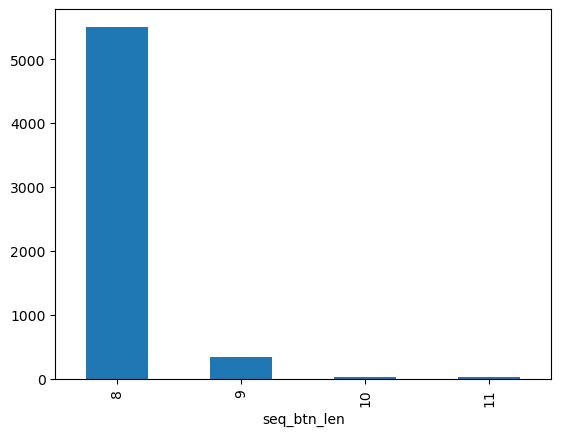

In [51]:
df_rbns.groupby('seq_btn_len')['seq'].count().plot.bar()

In [52]:
df_rbns_8 = df_rbns[df_rbns['seq_btn_len']==8]
df_rbns_8

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11,11,NaN,NaN,NaN,NaN,GAGAGCGT,8
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11,11,NaN,NaN,NaN,NaN,AAGCGGTC,8
@SRR7263706.5,AGGGTATGATGCGTTT,1,12,11,NaN,NaN,NaN,NaN,TATGATGC,8
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11,11,NaN,NaN,NaN,NaN,TAGTGTGC,8
@SRR7263706.12,GGGAGTGTGTTGTTT,0,11,11,NaN,NaN,NaN,NaN,AGTGTGTT,8
...,...,...,...,...,...,...,...,...,...,...
@SRR7263706.10337,GGGTTAGTGATGTTA,0,-1,-1,11.0,11.0,-1.0,-1.0,TTAGTGAT,8
@SRR7263706.10340,GGGATGCAGTCGTTG,0,-1,-1,11.0,11.0,-1.0,-1.0,ATGCAGTC,8
@SRR7263706.10394,GGGTTAGTGATGTTA,0,-1,-1,11.0,11.0,-1.0,-1.0,TTAGTGAT,8
@SRR7263706.10424,GGGTTGAGAGCGTTC,0,-1,-1,11.0,11.0,-1.0,-1.0,TTGAGAGC,8


In [53]:
df_rbns_9 = df_rbns[df_rbns['seq_btn_len']==9]
df_rbns_9

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len
@SRR7263706.49,GGGGAGTGATGCGTTT,0,12,12,NaN,NaN,NaN,NaN,GAGTGATGC,9
@SRR7263706.71,GGGGAGAGTCGTGTTT,0,12,12,NaN,NaN,NaN,NaN,GAGAGTCGT,9
@SRR7263706.91,GGGGATAGTGGAGTTT,0,12,12,NaN,NaN,NaN,NaN,GATAGTGGA,9
@SRR7263706.95,GGGGTATCAGTCGTTT,0,12,12,NaN,NaN,NaN,NaN,GTATCAGTC,9
@SRR7263706.181,GGGGATGAGCGCGTTT,0,12,12,NaN,NaN,NaN,NaN,GATGAGCGC,9
...,...,...,...,...,...,...,...,...,...,...
@SRR7263706.9616,GGGGAGTGATGCGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GAGTGATGC,9
@SRR7263706.9715,GGGGCAGTGAGGGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GCAGTGAGG,9
@SRR7263706.9981,GGGGAGTGTAGCGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GAGTGTAGC,9
@SRR7263706.10320,GGGGAGTGTGTTGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GAGTGTGTT,9


In [54]:
df_rbns_9['seq_btn_gggg'] = df_rbns_9.apply(lambda x: x.seq[findEndPos(x.seq, 'GGGG'):x.gtttPos] 
                                            if pd.isnull(x.gttPos) else x.seq[findEndPos(x.seq, 'GGGG'):int(x.gttPos)], axis=1)
df_rbns_9['seq_btn_gggg_len'] = df_rbns_9['seq_btn_gggg'].apply(len)
df_rbns_9

/tmp/ipykernel_31296/476453376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbns_9['seq_btn_gggg'] = df_rbns_9.apply(lambda x: x.seq[findEndPos(x.seq, 'GGGG'):x.gtttPos]
/tmp/ipykernel_31296/476453376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbns_9['seq_btn_gggg_len'] = df_rbns_9['seq_btn_gggg'].apply(len)


,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len,seq_btn_gggg,seq_btn_gggg_len
@SRR7263706.49,GGGGAGTGATGCGTTT,0,12,12,NaN,NaN,NaN,NaN,GAGTGATGC,9,AGTGATGC,8
@SRR7263706.71,GGGGAGAGTCGTGTTT,0,12,12,NaN,NaN,NaN,NaN,GAGAGTCGT,9,AGAGTCGT,8
@SRR7263706.91,GGGGATAGTGGAGTTT,0,12,12,NaN,NaN,NaN,NaN,GATAGTGGA,9,ATAGTGGA,8
@SRR7263706.95,GGGGTATCAGTCGTTT,0,12,12,NaN,NaN,NaN,NaN,GTATCAGTC,9,TATCAGTC,8
@SRR7263706.181,GGGGATGAGCGCGTTT,0,12,12,NaN,NaN,NaN,NaN,GATGAGCGC,9,ATGAGCGC,8
...,...,...,...,...,...,...,...,...,...,...,...,...
@SRR7263706.9616,GGGGAGTGATGCGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GAGTGATGC,9,AGTGATGC,8
@SRR7263706.9715,GGGGCAGTGAGGGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GCAGTGAGG,9,CAGTGAGG,8
@SRR7263706.9981,GGGGAGTGTAGCGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GAGTGTAGC,9,AGTGTAGC,8
@SRR7263706.10320,GGGGAGTGTGTTGTT,0,-1,-1,12.0,12.0,0.0,-1.0,GAGTGTGTT,9,AGTGTGTT,8


In [55]:
df_rbns_9[df_rbns_9['seq_btn_gggg_len'] != 8] #exclude. do not startswith GGGG (maybe insertion)

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len,seq_btn_gggg,seq_btn_gggg_len
@SRR7263706.1164,GGGATTAGCGTCGTTT,0,12,12,NaN,NaN,NaN,NaN,ATTAGCGTC,9,GGGATTAGCGTC,12
@SRR7263706.2550,GGGAAGTGTGTTGTTT,0,12,12,NaN,NaN,NaN,NaN,AAGTGTGTT,9,GGGAAGTGTGTT,12
@SRR7263706.2859,GGGAGTGAGTGCGTTT,0,12,12,NaN,NaN,NaN,NaN,AGTGAGTGC,9,GGGAGTGAGTGC,12
@SRR7263706.4246,GGGTTGAGTGATGTTT,0,12,12,NaN,NaN,NaN,NaN,TTGAGTGAT,9,GGGTTGAGTGAT,12
@SRR7263706.4272,GGGAGTGAGTGCGTTT,0,12,12,NaN,NaN,NaN,NaN,AGTGAGTGC,9,GGGAGTGAGTGC,12
@SRR7263706.5018,GGGAGTAGTGTAGTTT,0,12,12,NaN,NaN,NaN,NaN,AGTAGTGTA,9,GGGAGTAGTGTA,12
@SRR7263706.5152,GGGATTGAGCGTGTTT,0,12,12,NaN,NaN,NaN,NaN,ATTGAGCGT,9,GGGATTGAGCGT,12
@SRR7263706.5885,GGGAGAGTGAGTGTTT,0,12,12,NaN,NaN,NaN,NaN,AGAGTGAGT,9,GGGAGAGTGAGT,12
@SRR7263706.6305,GGGAGAGTCTGTGTTT,0,12,12,NaN,NaN,NaN,NaN,AGAGTCTGT,9,GGGAGAGTCTGT,12
@SRR7263706.7097,GGGTTGAGCATCGTTTG,0,12,12,NaN,NaN,NaN,NaN,TTGAGCATC,9,GGGTTGAGCATC,12


In [56]:
df_rbns_10_up = df_rbns[df_rbns['seq_btn_len']>=10]
df_rbns_10_up

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len
@SRR7263706.107,GGTAGTGTGAGTTTA,-1,10,11,NaN,NaN,NaN,NaN,GGTAGTGTGA,10
@SRR7263706.221,GGTGTTGTGAGTTTT,-1,10,11,NaN,NaN,NaN,NaN,GGTGTTGTGA,10
@SRR7263706.395,GTGAGAGTTGTGTTT,-1,11,12,NaN,NaN,NaN,NaN,GTGAGAGTTGT,11
@SRR7263706.440,GGTAGTGTGCGTTTG,-1,10,11,NaN,NaN,NaN,NaN,GGTAGTGTGC,10
@SRR7263706.705,GGTGAGTACGGTTTA,-1,10,11,NaN,NaN,NaN,NaN,GGTGAGTACG,10
@SRR7263706.777,GGAGAGTCGCGTTTG,-1,10,11,NaN,NaN,NaN,NaN,GGAGAGTCGC,10
@SRR7263706.971,GGAGGCAGTCGTTTGA,-1,10,11,NaN,NaN,NaN,NaN,GGAGGCAGTC,10
@SRR7263706.1099,GGTGAGGTGAGTTTT,-1,10,11,NaN,NaN,NaN,NaN,GGTGAGGTGA,10
@SRR7263706.1383,GGAGTGAGCACGTTTT,-1,11,12,NaN,NaN,NaN,NaN,GGAGTGAGCAC,11
@SRR7263706.1450,GGTCATGGTGAGTTT,-1,11,12,NaN,NaN,NaN,NaN,GGTCATGGTGA,11


In [57]:
df_rbns_10_up['seq_btn_gg/g5'] = df_rbns_10_up.apply(lambda x: x.seq[findEndPos(x.seq, 'GG'):x.gtttPos] 
                                                  if pd.isnull(x.gttPos) else x.seq[findEndPos(x.seq, 'GGGGG'):int(x.gttPos)], axis=1)
df_rbns_10_up['seq_btn_gg/g5_len'] = df_rbns_10_up['seq_btn_gg/g5'].apply(len)
df_rbns_10_up

/tmp/ipykernel_31296/98150864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbns_10_up['seq_btn_gg/g5'] = df_rbns_10_up.apply(lambda x: x.seq[findEndPos(x.seq, 'GG'):x.gtttPos]
/tmp/ipykernel_31296/98150864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbns_10_up['seq_btn_gg/g5_len'] = df_rbns_10_up['seq_btn_gg/g5'].apply(len)


,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len,seq_btn_gg/g5,seq_btn_gg/g5_len
@SRR7263706.107,GGTAGTGTGAGTTTA,-1,10,11,NaN,NaN,NaN,NaN,GGTAGTGTGA,10,TAGTGTGA,8
@SRR7263706.221,GGTGTTGTGAGTTTT,-1,10,11,NaN,NaN,NaN,NaN,GGTGTTGTGA,10,TGTTGTGA,8
@SRR7263706.395,GTGAGAGTTGTGTTT,-1,11,12,NaN,NaN,NaN,NaN,GTGAGAGTTGT,11,GTGAGAGTTGT,11
@SRR7263706.440,GGTAGTGTGCGTTTG,-1,10,11,NaN,NaN,NaN,NaN,GGTAGTGTGC,10,TAGTGTGC,8
@SRR7263706.705,GGTGAGTACGGTTTA,-1,10,11,NaN,NaN,NaN,NaN,GGTGAGTACG,10,TGAGTACG,8
@SRR7263706.777,GGAGAGTCGCGTTTG,-1,10,11,NaN,NaN,NaN,NaN,GGAGAGTCGC,10,AGAGTCGC,8
@SRR7263706.971,GGAGGCAGTCGTTTGA,-1,10,11,NaN,NaN,NaN,NaN,GGAGGCAGTC,10,AGGCAGTC,8
@SRR7263706.1099,GGTGAGGTGAGTTTT,-1,10,11,NaN,NaN,NaN,NaN,GGTGAGGTGA,10,TGAGGTGA,8
@SRR7263706.1383,GGAGTGAGCACGTTTT,-1,11,12,NaN,NaN,NaN,NaN,GGAGTGAGCAC,11,AGTGAGCAC,9
@SRR7263706.1450,GGTCATGGTGAGTTT,-1,11,12,NaN,NaN,NaN,NaN,GGTCATGGTGA,11,TCATGGTGA,9


<Axes: xlabel='seq_btn_gg/g5_len'>

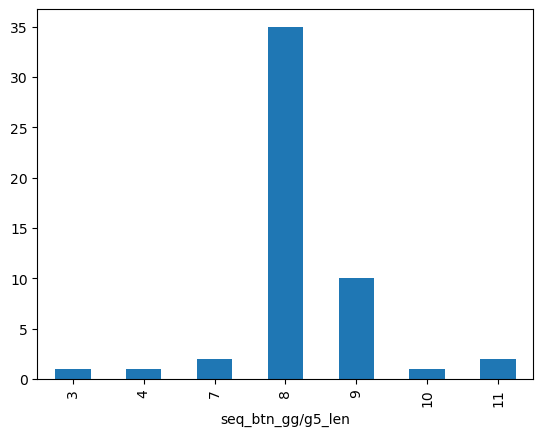

In [58]:
df_rbns_10_up.groupby('seq_btn_gg/g5_len')['seq'].count().plot.bar()

In [59]:
dfRbns = pd.concat([
    df_rbns_8,
    df_rbns_9[df_rbns_9['seq_btn_gggg_len']==8],
    df_rbns_10_up[df_rbns_10_up['seq_btn_gg/g5_len']==8]])
dfRbns

,seq,gggPos,gtttPos,len_btn,gttPos,len_btn_gtt,ggggPos,gggggPos,seq_btn,seq_btn_len,seq_btn_gggg,seq_btn_gggg_len,seq_btn_gg/g5,seq_btn_gg/g5_len
@SRR7263706.3,GGGGAGAGCGTGTTT,0,11,11,NaN,NaN,NaN,NaN,GAGAGCGT,8,NaN,NaN,NaN,NaN
@SRR7263706.4,GGGAAGCGGTCGTTT,0,11,11,NaN,NaN,NaN,NaN,AAGCGGTC,8,NaN,NaN,NaN,NaN
@SRR7263706.5,AGGGTATGATGCGTTT,1,12,11,NaN,NaN,NaN,NaN,TATGATGC,8,NaN,NaN,NaN,NaN
@SRR7263706.6,GGGTAGTGTGCGTTT,0,11,11,NaN,NaN,NaN,NaN,TAGTGTGC,8,NaN,NaN,NaN,NaN
@SRR7263706.12,GGGAGTGTGTTGTTT,0,11,11,NaN,NaN,NaN,NaN,AGTGTGTT,8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
@SRR7263706.10592,GGAGTGCAGCGTTTG,-1,10,11,NaN,NaN,NaN,NaN,GGAGTGCAGC,10,NaN,NaN,AGTGCAGC,8.0
@SRR7263706.538,GGGGGCTTGAGGCGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGCTTGAGGC,10,NaN,NaN,CTTGAGGC,8.0
@SRR7263706.1923,GGGGGGAGGTCGCGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGGAGGTCGC,10,NaN,NaN,GAGGTCGC,8.0
@SRR7263706.8295,GGGGGAAGTTCGTGTT,0,-1,-1,13.0,13.0,0.0,0.0,GGAAGTTCGT,10,NaN,NaN,AAGTTCGT,8.0


# Find the motif (most frequent k-mer)

In [60]:
RbnsSeq = pd.DataFrame(index = dfRbns.index, columns = ['seq'])
RbnsSeq

,seq
@SRR7263706.3,NaN
@SRR7263706.4,NaN
@SRR7263706.5,NaN
@SRR7263706.6,NaN
@SRR7263706.12,NaN
...,...
@SRR7263706.10592,NaN
@SRR7263706.538,NaN
@SRR7263706.1923,NaN
@SRR7263706.8295,NaN


In [61]:
RbnsSeq['seq'] = dfRbns.apply(lambda x: x.seq_btn if x.seq_btn_len == 8 
                              else (x.seq_btn_gggg if x.seq_btn_gggg_len == 8 else x['seq_btn_gg/g5']), axis=1)
RbnsSeq

,seq
@SRR7263706.3,GAGAGCGT
@SRR7263706.4,AAGCGGTC
@SRR7263706.5,TATGATGC
@SRR7263706.6,TAGTGTGC
@SRR7263706.12,AGTGTGTT
...,...
@SRR7263706.10592,AGTGCAGC
@SRR7263706.538,CTTGAGGC
@SRR7263706.1923,GAGGTCGC
@SRR7263706.8295,AAGTTCGT


In [62]:
with open("RBNS.fasta", 'w') as f:
    for i in range(len(RbnsSeq)):
        f.write(">RBNS_" + RbnsSeq.index[i] + "\n")
        f.write(RbnsSeq['seq'][i] + "\n") #fasta file 생성 

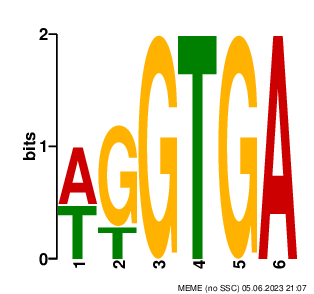

In [63]:
#MEME-suite 결과
from IPython.display import Image, display
display(Image(filename='/casa/chemin/p/bioinfo1_2023/Lin28A_RBNS_motif_MEME.png'))

# Enriched K-mer network

In [64]:
SeqCount = RbnsSeq.groupby('seq')['seq'].count()
dicSeqCount = {k:v for k, v in SeqCount.items()}
dicSeqCount

{'AAAAGTGA': 1,
 'AAAAGTGG': 1,
 'AAAGAGTC': 2,
 'AAAGCGTC': 2,
 'AAAGGAGC': 2,
 'AAAGGGGC': 1,
 'AAAGGGTC': 1,
 'AAAGGGTT': 3,
 'AAAGTCGT': 3,
 'AAAGTGGC': 1,
 'AAAGTGTC': 1,
 'AACGAGTC': 2,
 'AACGTCGT': 1,
 'AACTGAGC': 1,
 'AAGAAGTC': 11,
 'AAGACGTC': 3,
 'AAGAGAGC': 1,
 'AAGAGCAC': 1,
 'AAGAGCGC': 5,
 'AAGAGCGT': 11,
 'AAGAGGGC': 3,
 'AAGAGGTC': 7,
 'AAGAGTCG': 2,
 'AAGAGTGA': 1,
 'AAGAGTGC': 10,
 'AAGAGTGG': 1,
 'AAGAGTTG': 1,
 'AAGATGTC': 5,
 'AAGCAGTC': 25,
 'AAGCGGTC': 2,
 'AAGCTGTC': 1,
 'AAGGAGGA': 1,
 'AAGGAGGC': 6,
 'AAGGAGTC': 14,
 'AAGGAGTT': 3,
 'AAGGCGGC': 1,
 'AAGGCGTC': 5,
 'AAGGGAGC': 3,
 'AAGGGCGT': 1,
 'AAGGGGAC': 1,
 'AAGGGGTC': 2,
 'AAGGGGTT': 1,
 'AAGGGTAT': 1,
 'AAGGGTTA': 1,
 'AAGGTAGC': 1,
 'AAGGTAGT': 1,
 'AAGGTCGT': 49,
 'AAGGTGAA': 1,
 'AAGGTGAC': 2,
 'AAGGTGAG': 4,
 'AAGGTGAT': 14,
 'AAGGTGGA': 1,
 'AAGGTGGC': 5,
 'AAGGTGTA': 1,
 'AAGGTTGA': 2,
 'AAGGTTGT': 1,
 'AAGTACGT': 1,
 'AAGTAGGC': 1,
 'AAGTAGTC': 5,
 'AAGTCGGC': 1,
 'AAGTCGTA': 9,
 'AAGTCGTC': 16,


In [65]:
sorted(dicSeqCount.items(), key=lambda x: x[1], reverse=True)

[('AGTGATGC', 215),
 ('ATGAGCGT', 178),
 ('TTAGTGAT', 167),
 ('ATGAGCGC', 134),
 ('TGAGTGAT', 112),
 ('AGTGCAGC', 102),
 ('ATAGTGGC', 97),
 ('GAGCAGTC', 83),
 ('AGGAGCGT', 74),
 ('AGTGTAGC', 70),
 ('AGGCAGTC', 56),
 ('AGTGCGTC', 54),
 ('AGTGTGTT', 53),
 ('AGTATCGT', 52),
 ('AAGGTCGT', 49),
 ('AGGGTCGT', 43),
 ('AGTGAGTT', 38),
 ('AGTGGGTT', 37),
 ('AGTGTCGT', 37),
 ('AGAGTCGT', 35),
 ('ATGAGTGC', 33),
 ('ATGGTGAT', 33),
 ('GAGGTCGT', 33),
 ('AGTGCGTT', 32),
 ('TTGAGCGT', 32),
 ('AGTGGAGC', 31),
 ('AGAGTCGC', 26),
 ('AGTTGAGC', 26),
 ('GAAGTCGT', 26),
 ('AAGCAGTC', 25),
 ('AGAGCGTC', 25),
 ('TAAGTGAT', 25),
 ('TGGAGCGT', 25),
 ('AAGTGAGC', 24),
 ('AAGTGTGC', 23),
 ('AGTGAGGA', 23),
 ('AGTGAGGC', 23),
 ('AGGAGGTC', 22),
 ('ATGCAGTC', 22),
 ('AGGTGAGC', 21),
 ('AGTGAGTA', 21),
 ('AGTGAGTG', 21),
 ('ATGAGCAC', 21),
 ('TTGAGCGC', 21),
 ('ATTGAGTT', 20),
 ('AGGACGTC', 19),
 ('AGTGAAGC', 19),
 ('AGTGAGGT', 19),
 ('AGTGTGGC', 19),
 ('ATGAGGTC', 19),
 ('TGAGCATC', 19),
 ('TTGGTGAT', 19),
 ('ATA

In [66]:
def getKmer(seq,count,k):
    kmer = {}
    for i in range(len(seq)-k+1):
        if seq[i:i+k] in kmer:
            kmer[seq[i:i+k]] += count
        else:
            kmer[seq[i:i+k]] = count
    return kmer

In [67]:
def dict_seq_sum_k(dict_seq, k):
    dict_seq_k  = {key: getKmer(key, value, k) for key, value in dict_seq.items()}
    kmerDict = {}
    for (counts, kmer) in dict_seq_k.items():
        kmerDict['']

In [68]:
tetramer = Counter()

In [69]:
for seq, count in dicSeqCount.items():
    tetramer.update(getKmer(seq, count, 4))

In [70]:
tetramer

Counter({'AAAA': 2,
         'AAAG': 27,
         'AAGT': 410,
         'AGTG': 2255,
         'GTGA': 1497,
         'GTGG': 516,
         'AAGA': 78,
         'AGAG': 417,
         'GAGT': 1035,
         'AGTC': 693,
         'AAGC': 59,
         'AGCG': 677,
         'GCGT': 721,
         'CGTC': 290,
         'AAGG': 175,
         'AGGA': 331,
         'GGAG': 448,
         'GAGC': 1115,
         'AGGG': 188,
         'GGGG': 38,
         'GGGC': 132,
         'GGGT': 213,
         'GGTC': 437,
         'GGTT': 148,
         'GTCG': 569,
         'TCGT': 597,
         'TGGC': 212,
         'GTGT': 554,
         'TGTC': 162,
         'AACG': 10,
         'ACGA': 7,
         'CGAG': 33,
         'ACGT': 84,
         'AACT': 1,
         'ACTG': 1,
         'CTGA': 13,
         'TGAG': 1519,
         'AGAA': 25,
         'GAAG': 177,
         'AGAC': 17,
         'GACG': 73,
         'GAGA': 108,
         'AGCA': 232,
         'GCAC': 60,
         'GCGC': 211,
         'GAGG': 357,
   

"""with open('rbns_4mer.tsv', 'w') as f:
    w = csv.writer(f, delimiter='\t')
    w.writerows(kmer.items())"""

In [71]:
"""with open('rbns_4mer.txt','w') as f:
    for k, v in tetramer.items():
        f.write(f'{k}\n'*v)"""

"with open('rbns_4mer.txt','w') as f:\n    for k, v in tetramer.items():\n        f.write(f'{k}\n'*v)"

In [72]:
sorted(tetramer.items(), key=lambda x: x[1], reverse=True)

[('AGTG', 2255),
 ('TGAG', 1519),
 ('GTGA', 1497),
 ('GAGC', 1115),
 ('GAGT', 1035),
 ('TGAT', 750),
 ('GCGT', 721),
 ('AGTC', 693),
 ('AGCG', 677),
 ('TAGT', 662),
 ('TCGT', 597),
 ('GTCG', 569),
 ('ATGA', 560),
 ('GTGT', 554),
 ('GTGG', 516),
 ('GTGC', 510),
 ('AGGT', 486),
 ('GGAG', 448),
 ('GGTC', 437),
 ('AGAG', 417),
 ('AAGT', 410),
 ('GGTG', 389),
 ('TGTG', 385),
 ('GATG', 383),
 ('GAGG', 357),
 ('GCAG', 357),
 ('AGGA', 331),
 ('AGTT', 328),
 ('TGGT', 323),
 ('CGTC', 290),
 ('ATAG', 286),
 ('ATGC', 283),
 ('GTAG', 280),
 ('AGTA', 279),
 ('CAGT', 276),
 ('TTAG', 268),
 ('TTGA', 266),
 ('AGCA', 232),
 ('TGGG', 218),
 ('TGCG', 216),
 ('GTTG', 215),
 ('GGGT', 213),
 ('TGGC', 212),
 ('ATGG', 212),
 ('GCGC', 211),
 ('TGGA', 208),
 ('ATGT', 189),
 ('AGGG', 188),
 ('GAAG', 177),
 ('AGGC', 177),
 ('AAGG', 175),
 ('TAGC', 174),
 ('TGTC', 162),
 ('TAGG', 158),
 ('TGTA', 155),
 ('TGCA', 153),
 ('GGTT', 148),
 ('TTGT', 140),
 ('TAGA', 134),
 ('GGGC', 132),
 ('CAGC', 130),
 ('GTAT', 121),
 ('

In [73]:
pentamer = Counter()

for seq, count in dicSeqCount.items():
    pentamer.update(getKmer(seq, count, 5))

"""with open('rbns_5mer.txt','w') as f:
    for k, v in pentamer.items():
        f.write(f'{k}\n'*v)"""

"with open('rbns_5mer.txt','w') as f:\n    for k, v in pentamer.items():\n        f.write(f'{k}\n'*v)"

In [74]:
sorted(pentamer.items(), key=lambda x: x[1], reverse=True)

[('AGTGA', 1040),
 ('GTGAT', 693),
 ('TGAGC', 656),
 ('GAGCG', 611),
 ('TGAGT', 589),
 ('TAGTG', 539),
 ('ATGAG', 503),
 ('GTCGT', 452),
 ('AGCGT', 445),
 ('GAGTG', 442),
 ('GTGAG', 440),
 ('AGTGC', 404),
 ('AGTGG', 389),
 ('AGTGT', 387),
 ('TGATG', 291),
 ('AGTCG', 256),
 ('GGTGA', 255),
 ('CAGTC', 243),
 ('AGGAG', 240),
 ('GATGC', 238),
 ('TTAGT', 233),
 ('GAGTT', 232),
 ('AGGTC', 229),
 ('TTGAG', 227),
 ('GCAGT', 226),
 ('GGAGC', 219),
 ('AAGTG', 215),
 ('GGTCG', 212),
 ('ATAGT', 212),
 ('GAGTC', 210),
 ('GTGTG', 201),
 ('AGAGT', 193),
 ('AGCGC', 193),
 ('GTGGC', 190),
 ('TGCGT', 188),
 ('TGAGG', 183),
 ('TGGTG', 183),
 ('AGGTG', 178),
 ('GTGCG', 175),
 ('GCGTC', 173),
 ('GAGCA', 173),
 ('GAGGT', 160),
 ('TGGAG', 158),
 ('GGAGT', 157),
 ('AAGTC', 156),
 ('AGCAG', 144),
 ('TGCAG', 141),
 ('AGAGC', 140),
 ('ATGGT', 132),
 ('GTGGG', 131),
 ('GTGTA', 130),
 ('GAAGT', 126),
 ('TGTGA', 126),
 ('GTAGC', 125),
 ('GCAGC', 123),
 ('GTGCA', 122),
 ('AGTTG', 121),
 ('AGTAG', 120),
 ('TAGAG', 11

In [75]:
hexamer = Counter()

for seq, count in dicSeqCount.items():
    hexamer.update(getKmer(seq, count, 6))

"""with open('rbns_6mer.txt','w') as f:
    for k, v in hexmer.items():
        f.write(f'{k}\n'*v)"""

hexamer

Counter({'AAAAGT': 2,
         'AAAGTG': 8,
         'AAGTGA': 106,
         'AAGTGG': 49,
         'AAAGAG': 4,
         'AAGAGT': 22,
         'AGAGTC': 93,
         'AAAGCG': 2,
         'AAGCGT': 10,
         'AGCGTC': 67,
         'AAAGGA': 2,
         'AAGGAG': 31,
         'AGGAGC': 120,
         'AAAGGG': 5,
         'AAGGGG': 5,
         'AGGGGC': 2,
         'AAGGGT': 14,
         'AGGGTC': 81,
         'AGGGTT': 14,
         'AAAGTC': 6,
         'AAGTCG': 92,
         'AGTCGT': 172,
         'AGTGGC': 149,
         'AAGTGT': 32,
         'AGTGTC': 58,
         'AACGAG': 2,
         'ACGAGT': 2,
         'CGAGTC': 11,
         'AACGTC': 3,
         'ACGTCG': 1,
         'CGTCGT': 17,
         'AACTGA': 1,
         'ACTGAG': 1,
         'CTGAGC': 4,
         'AAGAAG': 11,
         'AGAAGT': 19,
         'GAAGTC': 79,
         'AAGACG': 3,
         'AGACGT': 9,
         'GACGTC': 45,
         'AAGAGA': 1,
         'AGAGAG': 11,
         'GAGAGC': 36,
         'AAGAGC': 25,
   

In [76]:
sorted(hexamer.items(), key=lambda x: x[1], reverse=True)

[('AGTGAT', 582),
 ('TGAGCG', 412),
 ('GAGCGT', 396),
 ('ATGAGC', 349),
 ('AGTGAG', 304),
 ('TGAGTG', 261),
 ('GTGATG', 248),
 ('TGATGC', 228),
 ('TAGTGA', 227),
 ('GAGTGA', 220),
 ('GCAGTC', 218),
 ('TTAGTG', 216),
 ('GAGCGC', 190),
 ('GGTCGT', 186),
 ('ATAGTG', 180),
 ('AGTCGT', 172),
 ('TAGTGG', 172),
 ('AGTGTG', 163),
 ('GTGAGT', 160),
 ('TGAGTT', 158),
 ('GTGCGT', 153),
 ('AGTGCG', 152),
 ('AGTGGC', 149),
 ('AGCAGT', 130),
 ('GTGAGC', 128),
 ('GAGTGC', 127),
 ('AGGTCG', 127),
 ('AGGAGC', 120),
 ('AGGTGA', 120),
 ('TGGTGA', 116),
 ('GGAGCG', 116),
 ('AGTGCA', 115),
 ('TGCAGC', 112),
 ('GTGCAG', 110),
 ('ATGAGT', 109),
 ('TTGAGC', 109),
 ('GAGTCG', 108),
 ('AGTGGG', 107),
 ('AAGTGA', 106),
 ('AGTGTA', 106),
 ('GAGGTC', 100),
 ('TTGAGT', 96),
 ('ATGGTG', 95),
 ('AGAGTC', 93),
 ('AAGTCG', 92),
 ('TAGTGT', 91),
 ('GAGCAG', 89),
 ('GGTGAT', 83),
 ('TGGAGC', 82),
 ('AGGGTC', 81),
 ('GTGAGG', 80),
 ('GTGTAG', 80),
 ('GAAGTC', 79),
 ('TGAGCA', 77),
 ('AGAGCG', 76),
 ('TGTAGC', 76),
 ('TGCG

In [77]:
def editDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1
    distances = range(len(s1)+1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1+1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [78]:
def hammingDistance(s1, s2):
    dist = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            dist += 1
    return dist


In [79]:
hexa_List =  sorted(hexamer.items(), key=lambda x: x[1], reverse=True)
hexamer_nodeList = [seq for seq, count in hexa_List][:20]
hexamer_nodeList

['AGTGAT',
 'TGAGCG',
 'GAGCGT',
 'ATGAGC',
 'AGTGAG',
 'TGAGTG',
 'GTGATG',
 'TGATGC',
 'TAGTGA',
 'GAGTGA',
 'GCAGTC',
 'TTAGTG',
 'GAGCGC',
 'GGTCGT',
 'ATAGTG',
 'AGTCGT',
 'TAGTGG',
 'AGTGTG',
 'GTGAGT',
 'TGAGTT']

In [80]:
hexamer_edgeList = []

for n1, n2 in combinations(hexamer_nodeList, 2):
    if editDistance(n1, n2) <= 2:
        hexamer_edgeList.append((n1, n2))

len(hexamer_edgeList)

56

In [81]:
hexamer_edge_dist2 = []
for n1, n2 in combinations(hexamer_nodeList, 2):
    if editDistance(n1, n2) == 2:
        hexamer_edge_dist2.append((n1, n2))

hexamer_edge_dist1 = []
for n1, n2 in combinations(hexamer_nodeList, 2):
    if editDistance(n1, n2) == 1:
        hexamer_edge_dist1.append((n1, n2))

In [82]:
except_node = []
n1, n2 = zip(*hexamer_edgeList)

for node in hexamer_nodeList:
    if node not in n1 and node not in n2:
        except_node.append(node)

except_node

['GCAGTC']

In [83]:
hexamer_nodeList = [x for x in hexamer_nodeList if x not in except_node]
hexamer_nodeList

['AGTGAT',
 'TGAGCG',
 'GAGCGT',
 'ATGAGC',
 'AGTGAG',
 'TGAGTG',
 'GTGATG',
 'TGATGC',
 'TAGTGA',
 'GAGTGA',
 'TTAGTG',
 'GAGCGC',
 'GGTCGT',
 'ATAGTG',
 'AGTCGT',
 'TAGTGG',
 'AGTGTG',
 'GTGAGT',
 'TGAGTT']

In [84]:
len(hexamer_nodeList)

19

In [85]:
hexamer_nodeCountList = [count for seq, count in hexa_List if seq in hexamer_nodeList]
hexamer_nodeCountList

[582,
 412,
 396,
 349,
 304,
 261,
 248,
 228,
 227,
 220,
 216,
 190,
 186,
 180,
 172,
 172,
 163,
 160,
 158]

/tmp/ipykernel_31296/2318518513.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, shrink=0.5, label='Count', location = 'right')


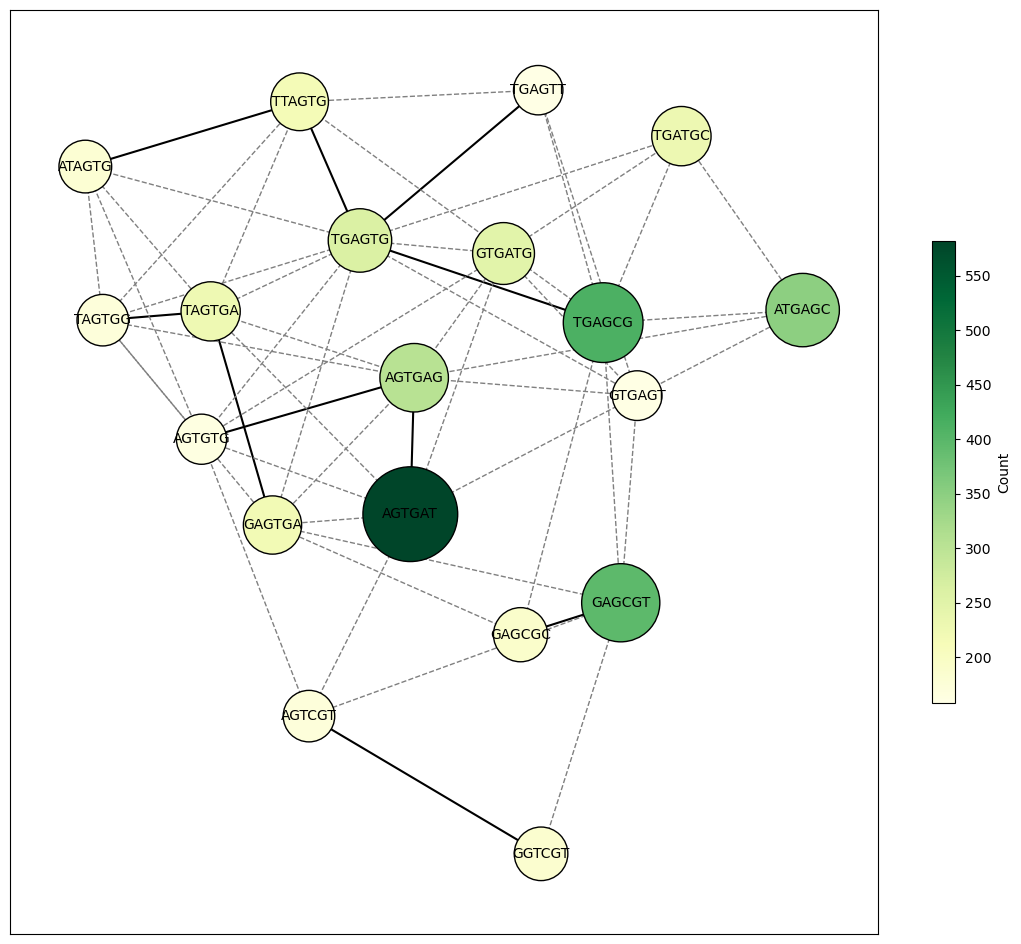

In [87]:
import networkx as nx

Net_6mer = nx.Graph()
Net_6mer.add_nodes_from(hexamer_nodeList)
Net_6mer.add_edges_from(hexamer_edgeList)
pos = nx.kamada_kawai_layout(Net_6mer)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 12))

nx.draw_networkx_nodes(Net_6mer, pos, nodelist=hexamer_nodeList, node_size=np.array(hexamer_nodeCountList) * 8, 
                        node_color = hexamer_nodeCountList, cmap = 'YlGn', edgecolors = 'k')
nx.draw_networkx_edges(Net_6mer, pos, edgelist=hexamer_edge_dist1, edge_color='k', width=1.5)
nx.draw_networkx_edges(Net_6mer, pos, edgelist=hexamer_edge_dist2, edge_color='gray', style='dashed')
nx.draw_networkx_labels(Net_6mer, pos, font_size=10)

"""nx.draw(Net_6mer, pos, with_labels=True, ax=ax, 
        node_color=hexamer_nodeCountList, node_size=np.array(hexamer_nodeCountList) * 8, 
        cmap='Blues', edgecolors = 'k')"""

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmax=max(hexamer_nodeCountList), vmin=min(hexamer_nodeCountList)), cmap='YlGn')
sm._A = []
plt.colorbar(sm, shrink=0.5, label='Count', location = 'right')
plt.savefig('rpdms_6mer_network.pdf', dpi=300, bbox_inches='tight')

# 기존에 알려진 GGAG와 새로 찾은 G[T/G]GAT motif를 갖는 gene들

In [159]:
#get the trasncriptome data of the same cell line (GRCm39)
!wget "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M32/gencode.vM32.transcripts.fa.gz" -P /casa/chemin/p/bioinfo1_2023/data_presentation

--2023-06-06 17:54:35--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M32/gencode.vM32.transcripts.fa.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56246898 (54M) [application/x-gzip]
Saving to: ‘/casa/chemin/p/bioinfo1_2023/data_presentation/gencode.vM32.transcripts.fa.gz’

gencode.vM32.transc 100%[===================>]  53.64M   244KB/s    in 3m 51s  

2023-06-06 17:58:27 (238 KB/s) - ‘/casa/chemin/p/bioinfo1_2023/data_presentation/gencode.vM32.transcripts.fa.gz’ saved [56246898/56246898]



In [160]:
!gunzip /casa/chemin/p/bioinfo1_2023/data_presentation/gencode.vM32.transcripts.fa.gz

In [3]:
cnts = pd.read_csv('/casa/chemin/p/bioinfo1_2023/binfo1-work/read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [4]:
bam_list = [x for x in cnts.columns if x.split('.')[-1]=='bam']
cnts_filtered = cnts[(cnts[bam_list] >= 100).any(axis = 1)].copy() # read counts 100 이상인 것들만 필터링
cnts_filtered

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2
ENSMUSG00000103265.2,chr1,4805269,4805899,-,631,5,107,3,0,1,0
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44
...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329


In [5]:
cnts_filtered['clip_enrichment'] = cnts_filtered['CLIP-35L33G.bam'] / cnts_filtered['RNA-control.bam']
cnts_filtered['rden_change'] = (cnts_filtered['RPF-siLin28a.bam'] / cnts_filtered['RNA-siLin28a.bam']) / (cnts_filtered['RPF-siLuc.bam'] / cnts_filtered['RNA-siLuc.bam'])
cnts_filtered.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227
ENSMUSG00000103265.2,chr1,4805269,4805899,-,631,5,107,3,0,1,0,0.046729,NaN
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459


In [6]:
from Bio import SeqIO

transcriptome = {}
isoformCounts = Counter()

for record in SeqIO.parse('/casa/chemin/p/bioinfo1_2023/data_presentation/gencode.vM32.transcripts.fa', format='fasta'):
    assert record.id not in transcriptome
    transcriptome[record.id] = str(record.seq)
    isoformCounts.update([record.id.split('|')[1]])

In [ ]:
!bedtools bamtofastq -i binfo1-work/RNA-control.bam -fq data_presentation/RNA-control.fastq

In [210]:
!kallisto index -i data_presentation/gencode.vM32.transcripts.kallisto.idx data_presentation/gencode.vM32.transcripts.fa


[build] loading fasta file data_presentation/gencode.vM32.transcripts.fa
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 876 target sequences
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 907502 contigs and contains 123256487 k-mers 



In [212]:
!kallisto quant -i data_presentation/gencode.vM32.transcripts.kallisto.idx --single -l 200 -s 20 -o data_presentation/RNA-control_kallisto_transcript data_presentation/RNA-control.fastq


[quant] fragment length distribution is truncated gaussian with mean = 200, sd = 20
[index] k-mer length: 31
[index] number of targets: 149,384
[index] number of k-mers: 123,256,487
[index] number of equivalence classes: 538,033
[quant] running in single-end mode
[quant] will process file 1: data_presentation/RNA-control.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 49,942,116 reads, 34,764,812 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 1,278 rounds



In [7]:
RNActrl_transcript = {}

with open('data_presentation/RNA-control_kallisto_transcript/abundance.tsv') as f:
    for i, line in enumerate(f):
        if not i:
            pass
        else:
            tpm = float(line.split('\t')[4])
            transcriptid = line.split('\t')[0]
            geneid = transcriptid.split('|')[1].split('.')[0]
                
            if geneid not in RNActrl_transcript :
                RNActrl_transcript[geneid] = (transcriptid, tpm)
            else:
                if tpm > RNActrl_transcript[geneid][1]:
                    RNActrl_transcript[geneid] = (transcriptid, tpm)
                else:
                    pass


In [8]:
cnts_filtered['transcript_id'] = cnts_filtered.index.to_series().apply(lambda x: RNActrl_transcript[x.split('.')[0]][0] if x.split('.')[0] in RNActrl_transcript else None)
cnts_filtered['transcript_seq'] = cnts_filtered.apply(lambda x: transcriptome[x.transcript_id] if x.transcript_id is not None else None, axis=1)
cnts_filtered

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,transcript_id,transcript_seq
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227,ENSMUST00000192427.2|ENSMUSG00000102343.2|OTTM...,AATCTTACCTCGGAAGCCCAGAAGGCCTCAGTGGCCTGGCCGGCCT...
ENSMUSG00000103265.2,chr1,4805269,4805899,-,631,5,107,3,0,1,0,0.046729,NaN,ENSMUST00000195671.2|ENSMUSG00000103265.2|OTTM...,GGACAGTGAGTTGGTGACCCCTTCTACTGAGCCAGTGCTGGAGCCT...
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151,ENSMUST00000193658.2|ENSMUSG00000103922.2|OTTM...,ATGGCGGTGGTGGCTGGTCTGGTGCGGGGACCCTTGCGGCAGGTTT...
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091,ENSMUST00000115538.5|ENSMUSG00000033845.14|OTT...,GGAGCCGTAAAGCAACGCGGAGTCTACGCCGCTTCCTGGGCGCCCT...
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459,ENSMUST00000027036.11|ENSMUSG00000025903.15|OT...,GAGCGCGCGCCCGGAGGGGCGGGCTGGGACTTTCGGCTGCCGGGAG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUST00000082418.1|ENSMUSG00000064367.1|-|-|...,ATCAATATTTTCACAACCTCAATCTTATTAATCTTCATTCTTCTAC...
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,ENSMUST00000082419.1|ENSMUSG00000064368.1|-|-|...,ATGAATAATTATATTTTTGTTTTAAGTTCATTATTTTTGGTTGGTT...
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,ENSMUST00000082421.1|ENSMUSG00000064370.1|-|-|...,ATGACAAACATACGAAAAACACACCCATTATTTAAAATTATTAACC...


In [9]:
cnts_filtered[cnts_filtered['transcript_id'].isna()] #transcriptome fasta file이 업데이트 되면서 빠진 것으로 보임. 분석에서 제외해야 할 듯.

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,transcript_id,transcript_seq
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000075015.4,chr2;chr2;chr2;chr2,98492582;98493465;98494151;98494306,98492867;98493469;98494240;98494428,+;+;+;+,504,113,14,186,179,1,0,8.071429,inf,None,None
ENSMUSG00000075014.2,chr2;chr2;chr2;chr2;chr2,98496892;98497080;98497411;98497424;98497578,98497014;98497385;98497422;98497573;98497646,-;-;-;-;-,660,18,17,119,127,0,0,1.058824,NaN,None,None
ENSMUSG00000096201.2,chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9,3036877;3036947;3037111;3037181;3037665;303772...,3036942;3037429;3037176;3037489;3037684;303789...,+;+;+;+;+;+;+;+;+,935,156,1,8,20,0,0,156.000000,NaN,None,None


In [10]:
cnts_filtered = cnts_filtered[~cnts_filtered['transcript_id'].isna()]

In [11]:
cnts_filtered

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,transcript_id,transcript_seq
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227,ENSMUST00000192427.2|ENSMUSG00000102343.2|OTTM...,AATCTTACCTCGGAAGCCCAGAAGGCCTCAGTGGCCTGGCCGGCCT...
ENSMUSG00000103265.2,chr1,4805269,4805899,-,631,5,107,3,0,1,0,0.046729,NaN,ENSMUST00000195671.2|ENSMUSG00000103265.2|OTTM...,GGACAGTGAGTTGGTGACCCCTTCTACTGAGCCAGTGCTGGAGCCT...
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151,ENSMUST00000193658.2|ENSMUSG00000103922.2|OTTM...,ATGGCGGTGGTGGCTGGTCTGGTGCGGGGACCCTTGCGGCAGGTTT...
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091,ENSMUST00000115538.5|ENSMUSG00000033845.14|OTT...,GGAGCCGTAAAGCAACGCGGAGTCTACGCCGCTTCCTGGGCGCCCT...
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459,ENSMUST00000027036.11|ENSMUSG00000025903.15|OT...,GAGCGCGCGCCCGGAGGGGCGGGCTGGGACTTTCGGCTGCCGGGAG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUST00000082418.1|ENSMUSG00000064367.1|-|-|...,ATCAATATTTTCACAACCTCAATCTTATTAATCTTCATTCTTCTAC...
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,ENSMUST00000082419.1|ENSMUSG00000064368.1|-|-|...,ATGAATAATTATATTTTTGTTTTAAGTTCATTATTTTTGGTTGGTT...
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,ENSMUST00000082421.1|ENSMUSG00000064370.1|-|-|...,ATGACAAACATACGAAAAACACACCCATTATTTAAAATTATTAACC...


In [12]:
motif_condition = [
    cnts_filtered['transcript_seq'].str.contains(r'(GGAG)(G[GT]GAT)', regex = True),
    cnts_filtered['transcript_seq'].str.contains('GGAG', regex = True),
    cnts_filtered['transcript_seq'].str.contains('G[GT]GAT', regex = True)
]
motif_choice = ['Both', 'GGAG', 'GKGAT']

/tmp/ipykernel_31296/2112145330.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cnts_filtered['transcript_seq'].str.contains(r'(GGAG)(G[GT]GAT)', regex = True),


In [13]:
cnts_filtered['contain_motif'] = np.select(motif_condition, motif_choice, default = 'None')
cnts_filtered

/tmp/ipykernel_31296/3543447554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_filtered['contain_motif'] = np.select(motif_condition, motif_choice, default = 'None')


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,transcript_id,transcript_seq,contain_motif
Geneid,,,,,,,,,,,,,,,,
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227,ENSMUST00000192427.2|ENSMUSG00000102343.2|OTTM...,AATCTTACCTCGGAAGCCCAGAAGGCCTCAGTGGCCTGGCCGGCCT...,GGAG
ENSMUSG00000103265.2,chr1,4805269,4805899,-,631,5,107,3,0,1,0,0.046729,NaN,ENSMUST00000195671.2|ENSMUSG00000103265.2|OTTM...,GGACAGTGAGTTGGTGACCCCTTCTACTGAGCCAGTGCTGGAGCCT...,GGAG
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151,ENSMUST00000193658.2|ENSMUSG00000103922.2|OTTM...,ATGGCGGTGGTGGCTGGTCTGGTGCGGGGACCCTTGCGGCAGGTTT...,GGAG
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091,ENSMUST00000115538.5|ENSMUSG00000033845.14|OTT...,GGAGCCGTAAAGCAACGCGGAGTCTACGCCGCTTCCTGGGCGCCCT...,GGAG
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459,ENSMUST00000027036.11|ENSMUSG00000025903.15|OT...,GAGCGCGCGCCCGGAGGGGCGGGCTGGGACTTTCGGCTGCCGGGAG...,GGAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUST00000082418.1|ENSMUSG00000064367.1|-|-|...,ATCAATATTTTCACAACCTCAATCTTATTAATCTTCATTCTTCTAC...,GGAG
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,ENSMUST00000082419.1|ENSMUSG00000064368.1|-|-|...,ATGAATAATTATATTTTTGTTTTAAGTTCATTATTTTTGGTTGGTT...,GGAG
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,ENSMUST00000082421.1|ENSMUSG00000064370.1|-|-|...,ATGACAAACATACGAAAAACACACCCATTATTTAAAATTATTAACC...,GGAG


In [14]:
cnts_filtered['contain_motif'].groupby(cnts_filtered['contain_motif']).count()

contain_motif
Both       422
GGAG     10834
GKGAT       56
None        78
Name: contain_motif, dtype: int64

In [15]:
cnts_filtered_both_gkgat = cnts_filtered[(cnts_filtered['contain_motif']=='Both')|(cnts_filtered['contain_motif']=='GKGAT')].copy()
cnts_filtered_both_gkgat

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,transcript_id,transcript_seq,contain_motif
Geneid,,,,,,,,,,,,,,,,
ENSMUSG00000025938.17,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,12936773;12936776;12941572;12946534;12946534;1...,12942552;12942552;12942552;12946598;12946598;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,13137,380,79,160,110,38,29,4.810127,0.900862,ENSMUST00000188454.7|ENSMUSG00000025938.17|OTT...,CTGATTTCTCGGCGGCGGGACCGAGACGGTCTCCGCAGGCGGCTGG...,Both
ENSMUSG00000037447.17,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,36346814;36346835;36346835;36346835;36346835;3...,36346917;36346917;36346917;36346917;36346917;3...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,12540,55,51,127,84,34,52,1.078431,0.432465,ENSMUST00000192874.2|ENSMUSG00000037447.17|OTT...,GCGCCGAGAGCGCTGGGACAGGACGGCTGTGCGTGTAGAGGGTCTC...,Both
ENSMUSG00000026088.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,37913882;37917969;37917971;37918069;37918346;3...,37914206;37918444;37918141;37918444;37918444;3...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,2770,174,192,375,364,143,233,0.906250,0.595731,ENSMUST00000027257.10|ENSMUSG00000026088.16|OT...,AGAAGACAGCGCAGGCGCAGCGGCGTCACGCGTGCGCTTCCTGGAA...,Both
ENSMUSG00000077345.3,chr1,59731093,59731179,+,87,140,4,4,3,0,0,35.000000,NaN,ENSMUST00000104157.3|ENSMUSG00000077345.3|-|-|...,TTCATTGTTGTCAATGATGTATACCTTTTGGAACTGAATCTAAGTG...,GKGAT
ENSMUSG00000026014.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,60521451;60522344;60522395;60529835;60532482;6...,60529480;60522499;60522499;60530103;60532839;6...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,20498,1722,739,2111,1219,1642,2725,2.330176,0.347954,ENSMUST00000140485.8|ENSMUSG00000026014.16|OTT...,CGCCGCGGGGCTCTGCGGCCGCCCCGCCCAGTCCCCGCCGACGCCC...,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000042903.9,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX,100298134;100298173;100298427;100298763;100299...,100298879;100298879;100298597;100298879;100300...,+;+;+;+;+;+;+;+,3485,389,392,1029,764,219,376,0.992347,0.432448,ENSMUST00000062000.6|ENSMUSG00000042903.9|OTTM...,GCCTCAGGTTTAAAAGAGCAGGAAGCTGAGTGAGAGGGTGCAGAAA...,Both
ENSMUSG00000031284.17,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;c...,142301587;142301694;142311536;142447286;142447...,142301759;142301759;142311695;142447318;142447...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9552,184,13,30,29,6,10,14.153846,0.580000,ENSMUST00000156449.8|ENSMUSG00000031284.17|OTT...,AGTAGGCAGGCAGCTGTGGCCGCAAACTGTCTGGGGTCTTACGCTG...,Both
ENSMUSG00000041649.14,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;c...,152020462;152020744;152020947;152091848;152142...,152020507;152021088;152021088;152091920;152142...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,5206,334,222,811,457,231,229,1.504505,0.568423,ENSMUST00000039545.5|ENSMUSG00000041649.14|OTT...,CTGACACAGAAAGAGCTATGTACTCCATCTGCTCAGATTGCCTGGG...,Both


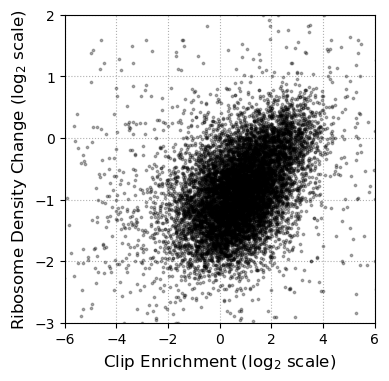

In [102]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))

"""ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['rden_change']),
        c='gray',s=1, alpha = 0.5)"""
ax.scatter(np.log2(cnts_filtered['clip_enrichment']),
        np.log2(cnts_filtered['rden_change']),
        c='k', s=3, alpha = 0.3, zorder = 2)

ax.set_xlim((-6, 6))
ax.set_ylim((-3, 2))
ax.set_xlabel(r'Clip Enrichment (log$_2$ scale)', fontsize = 12)
ax.set_ylabel(r'Ribosome Density Change (log$_2$ scale)', fontsize = 12)
ax.grid(True, zorder=1, linestyle = 'dotted')
plt.savefig('scatter_clip_riboseq.pdf', dpi = 300, bbox_inches = 'tight')

/casa/chemin/miniconda3/envs/rpdms/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


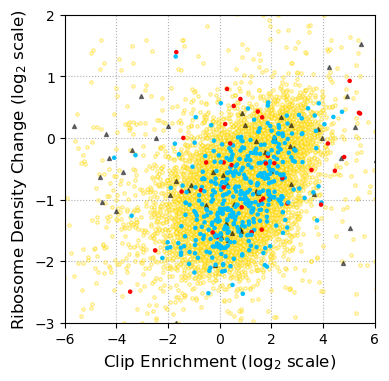

In [88]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))

colors = {'Both': 'deepskyblue', 'GGAG': 'gold', 'GKGAT': 'red', 'None': 'black'}

"""ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['rden_change']),
        c='gray',s=1, alpha = 0.5)"""
ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['rden_change']),
        c='w', edgecolor='gold',s=5, alpha = 0.5, zorder = 2)

ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='None']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='None']['rden_change']),
        c='black', marker = '^',s=8, alpha = 0.5, zorder = 2)

ax.scatter(np.log2(cnts_filtered_both_gkgat['clip_enrichment']),
        np.log2(cnts_filtered_both_gkgat['rden_change']),
        c=[colors[motif] for motif in cnts_filtered_both_gkgat['contain_motif']],
        s=5, zorder = 2)
ax.set_xlim((-6, 6))
ax.set_ylim((-3, 2))
ax.set_xlabel(r'Clip Enrichment (log$_2$ scale)', fontsize = 12)
ax.set_ylabel(r'Ribosome Density Change (log$_2$ scale)', fontsize = 12)
ax.grid(True, zorder=1, linestyle = 'dotted')
plt.savefig('scatter_clip_riboseq_withmotif.pdf', dpi = 300, bbox_inches = 'tight')

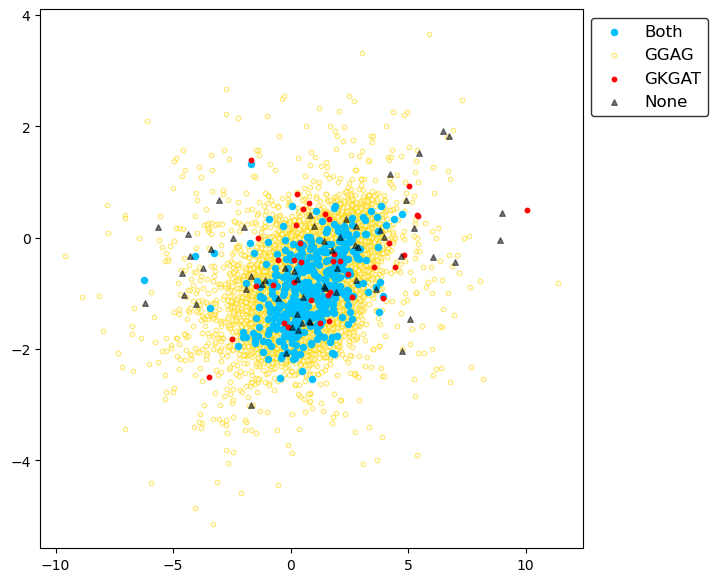

In [89]:
# for legend
fig, ax = plt.subplots(1, 1, figsize = (7,7))

motif = cnts_filtered_both_gkgat.groupby('contain_motif')

ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GGAG']['rden_change']),
        c='w', edgecolor='gold',s=10, alpha = 0.5, zorder = 1, label = 'GGAG')

ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='Both']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='Both']['rden_change']),
        c='deepskyblue',s=19, alpha = 1, zorder = 1, label = 'Both')

ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GKGAT']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='GKGAT']['rden_change']),
        c='r',s=10, alpha = 1, zorder = 1, label = 'GKGAT')

ax.scatter(np.log2(cnts_filtered[cnts_filtered['contain_motif']=='None']['clip_enrichment']),
        np.log2(cnts_filtered[cnts_filtered['contain_motif']=='None']['rden_change']),
        c='black', marker = '^',s=16, alpha = 0.5, zorder = 1, label = 'None')


config_legend = dict( ## 범례 설정
    loc = 'upper left', # 범례 위치 설정
    edgecolor='k' # 범례 박스 테두리
)
 
handles, labels = ax.get_legend_handles_labels() ## 범례 처리되는 요소와 해당 라벨 
 
dict_labels_handles = dict(zip(labels, handles)) ## 라벨을 키로 요소를 밸류로 하는 딕셔너리 생성
 
labels = ['Both','GGAG','GKGAT','None'] ## 원하는 순서 라벨
handles = [dict_labels_handles[l] for l in labels] ## 라벨 순서에 맞게 요소 재배치
 
ax.legend(handles,labels,**config_legend, bbox_to_anchor=(1, 1), fontsize = 12) ## 범례 표시
plt.savefig('scatter_clip_riboseq_withmotif_legend.pdf', dpi = 600, bbox_inches = 'tight')

In [90]:
def exceptinf(df):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    return df

In [91]:
cnts_forcorr = exceptinf(cnts_filtered)
cnts_forcorr

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,transcript_id,transcript_seq,contain_motif
Geneid,,,,,,,,,,,,,,,,
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227,ENSMUST00000192427.2|ENSMUSG00000102343.2|OTTM...,AATCTTACCTCGGAAGCCCAGAAGGCCTCAGTGGCCTGGCCGGCCT...,GGAG
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151,ENSMUST00000193658.2|ENSMUSG00000103922.2|OTTM...,ATGGCGGTGGTGGCTGGTCTGGTGCGGGGACCCTTGCGGCAGGTTT...,GGAG
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091,ENSMUST00000115538.5|ENSMUSG00000033845.14|OTT...,GGAGCCGTAAAGCAACGCGGAGTCTACGCCGCTTCCTGGGCGCCCT...,GGAG
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459,ENSMUST00000027036.11|ENSMUSG00000025903.15|OT...,GAGCGCGCGCCCGGAGGGGCGGGCTGGGACTTTCGGCTGCCGGGAG...,GGAG
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,2.175853,0.562609,ENSMUST00000081551.14|ENSMUSG00000033813.16|OT...,GGAAGGCCTAGGCCAGCGGCTTCGCGGCTTGTCCAACGTCCGCGCA...,GGAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUST00000082418.1|ENSMUSG00000064367.1|-|-|...,ATCAATATTTTCACAACCTCAATCTTATTAATCTTCATTCTTCTAC...,GGAG
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,ENSMUST00000082419.1|ENSMUSG00000064368.1|-|-|...,ATGAATAATTATATTTTTGTTTTAAGTTCATTATTTTTGGTTGGTT...,GGAG
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,ENSMUST00000082421.1|ENSMUSG00000064370.1|-|-|...,ATGACAAACATACGAAAAACACACCCATTATTTAAAATTATTAACC...,GGAG


In [98]:
motif = cnts_filtered.groupby('contain_motif')
corr_list = [{motif:stats.pearsonr(cnts_forcorr[cnts_forcorr['contain_motif'] == motif]['clip_enrichment'],
                                   cnts_forcorr[cnts_forcorr['contain_motif'] == motif]['rden_change'])} for motif in ['Both', 'GGAG', 'GKGAT', 'None']]


In [99]:
corr_list

[{'Both': PearsonRResult(statistic=0.40721201732155426, pvalue=3.624183261448215e-18)},
 {'GGAG': PearsonRResult(statistic=0.0541304412150708, pvalue=2.3381555832205183e-08)},
 {'GKGAT': PearsonRResult(statistic=0.15584073426377806, pvalue=0.3305683073468383)},
 {'None': PearsonRResult(statistic=0.21583650652216624, pvalue=0.08672832343028454)}]